In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA

In [3]:
data = pd.read_csv("airline-passengers.csv")
data.head(15)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
data['Month'] = pd.to_datetime(data['Month'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
data

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [8]:
data.index = data['Month']

In [9]:
data.head()

,Month,Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [10]:
del data['Month']

In [11]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
data.shape

(144, 1)

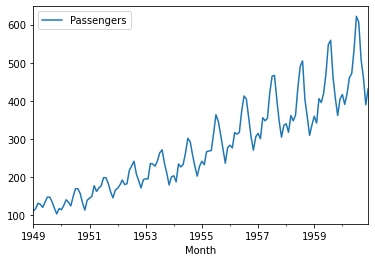

In [13]:
data.plot()
plt.show()
#data has both trend and seasonality
#trend --> as the years go, passengers increase i.e. trend
#seasonality --> irrespective of number of people, every year there is a pattern followed i.e. certain months passengers are 
#high and certain low

In [14]:
mean_log = data.rolling(window = 12).mean()
std_log = data.rolling(window = 12).std()

In [15]:
mean_log

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


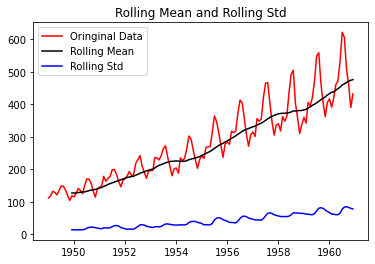

In [16]:
plt.plot(data, color = 'red', label = 'Oringinal Data')
plt.plot(mean_log, color = 'black', label = 'Rolling Mean')
plt.plot(std_log, color = 'blue', label = 'Rolling Std')
plt.legend()
plt.title('Rolling Mean and Rolling Std')
plt.show()
#non-stationary data

In [17]:
firstl = np.log(data)
firstl = firstl.dropna()
firstl

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [18]:
mean_log = firstl.rolling(window = 12).mean()
std_log = firstl.rolling(window = 12).std()

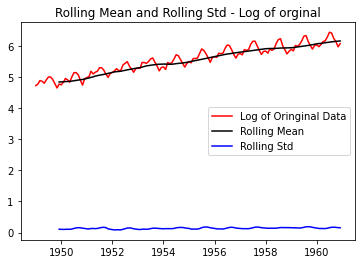

In [19]:


plt.plot(firstl, color = 'red', label = 'Log of Oringinal Data')
plt.plot(mean_log, color = 'black', label = 'Rolling Mean')
plt.plot(std_log, color = 'blue', label = 'Rolling Std')
plt.legend()
plt.title('Rolling Mean and Rolling Std - Log of orginal')
plt.show()

#data almost converted to stationary

In [20]:
data1= firstl - mean_log
data1 = data1.dropna()
data1

#to make mean almost near to 0, we subtract mean from its data

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


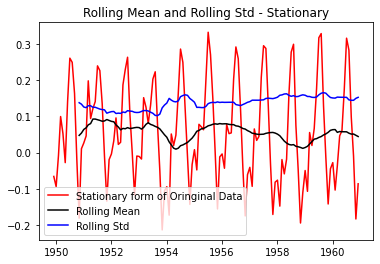

In [21]:
mean_log = data1.rolling(window = 12).mean()
std_log = data1.rolling(window = 12).std()

plt.plot(data1, color = 'red', label = 'Stationary form of Oringinal Data')
plt.plot(mean_log, color = 'black', label = 'Rolling Mean')
plt.plot(std_log, color = 'blue', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling Std - Stationary')
plt.show()

#mean moved almost near to 0, i.e. stationary

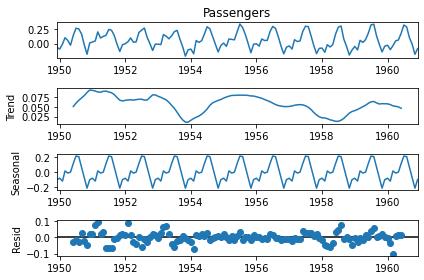

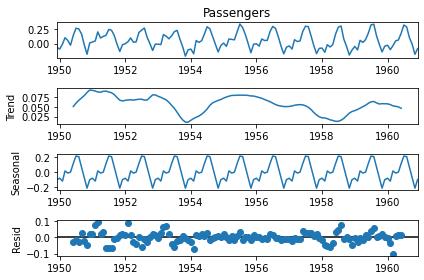

In [22]:
decomp = seasonal_decompose(data1['Passengers'])
decomp.plot()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\God\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\God\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
C:\Users\God\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\God\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


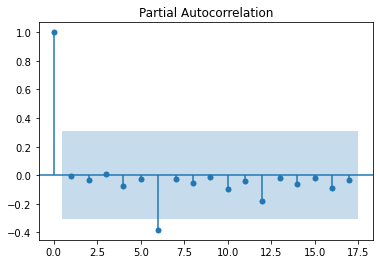

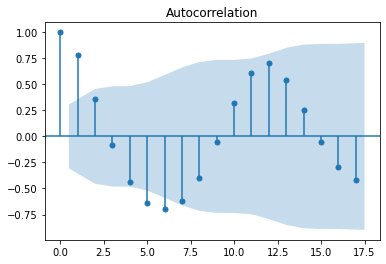

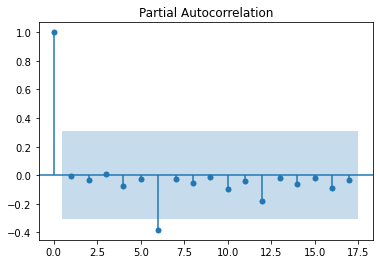

In [24]:
acf_plot = acf(data1)
pacf_plot = pacf(data1)

plot_acf(acf_plot)
plot_pacf(pacf_plot)

In [25]:
data1.shape

(133, 1)

In [25]:
train = data1.iloc[:120]['Passengers']
test = data1.iloc[121:]['Passengers']

In [26]:
train.shape

(120,)

In [27]:
arima = ARIMA(train, order = (1,0,2))
a_fit = arima.fit()

C:\Users\God\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

C:\Users\God\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  # If an index is available, see if it is a da

<AxesSubplot:xlabel='Month'>

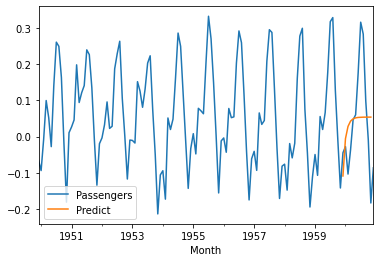

In [28]:
data1["Predict"] = a_fit.predict(start = len(train), end=len(train)+len(test)-1)
data1[['Passengers',"Predict"]].plot()

#clearly the accuracy is low, we also have less data and hence we can go for another model

In [29]:
data1

,Passengers,Predict
Month,,
1949-12-01,-0.065494,NaN
1950-01-01,-0.093449,NaN
1950-02-01,-0.007566,NaN
1950-03-01,0.099416,NaN
1950-04-01,0.052142,NaN
...,...,...
1960-08-01,0.282363,0.053615
1960-09-01,0.098235,0.053710
1960-10-01,-0.009230,0.053751


In [33]:
data1["Predict"].shape

(133,)

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

In [67]:
sry = SARIMAX(train, order =(1,0,2), seasonal_order=(1,0,2,12))
sry_fit = sry.fit()

C:\Users\God\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\God\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\God\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\God\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [80]:
data1['Predict'] = sry_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)

<AxesSubplot:xlabel='Month'>

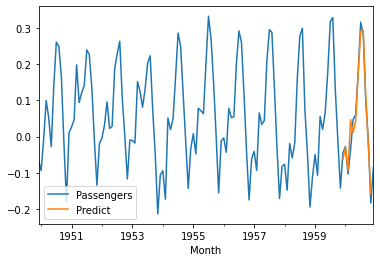

In [81]:
data1[["Passengers","Predict"]].plot()

<AxesSubplot:xlabel='Month'>

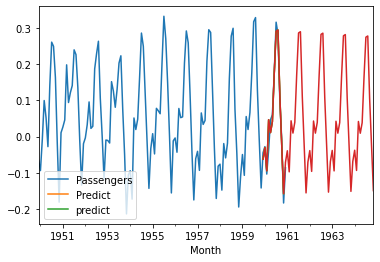

In [82]:
future = sry_fit.forecast(steps = 60)
data1.plot()
future.plot()
#shows the future 